In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,AveragePooling2D,Activation,BatchNormalization,Flatten,add,GlobalAvgPool2D

In [2]:
from PIL import Image

In [3]:
%config Completer.use_jedi=False

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import os

In [6]:
train_dir='./dataset/train/'
test_dir='./dataset/test/'
valid_dir='./dataset/valid/'

In [7]:
train_data_gen=ImageDataGenerator(
    #featurewise_center=False,
    #samplewise_center=False,
    #featurewise_std_normalization=False,
   # samplewise_std_normalization=False,
    #zca_whitening=False,
    #zca_epsilon=1e-06,
    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #brightness_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    #vertical_flip=False,
    rescale=1./255,
    #preprocessing_function=None,
    #data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [17]:
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224, 224),
    #color_mode='rgb',
    #classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True
   # seed=None,
    #save_to_dir=None,
    #save_prefix='',
    #save_format='png',
    #follow_links=False,
    #subset=None,
    #interpolation='nearest',
)

Found 2999 images belonging to 3 classes.


In [18]:
valid_data=ImageDataGenerator(rescale=1./255).flow_from_directory(valid_dir,target_size=(224, 224),class_mode='categorical',
    batch_size=32,
    shuffle=True)

Found 2585 images belonging to 3 classes.


#### 输入层：维度为224×224×3
卷积层1：96个大小为11×11的卷积核，步长为4，激活函数为ReLU，padding方式为valid
批归一化层1
池化层1：窗口大小为3×3，步长为2，padding方式为valid
卷积层2：128个大小为5×5的卷积核，步长为1，激活函数为ReLU，padding方式为same
批归一化层2
池化层2：窗口大小为3×3，步长为2，padding方式为valid
卷积层3：192个大小为3×3的卷积核，步长为1，激活函数为ReLU，padding方式为same
卷积层4：128个大小为3×3的卷积核，步长为1，激活函数为ReLU，padding方式为same
池化层3：窗口大小为3×3，步长为2，padding方式为valid
扁平化
全连接层：神经元个数为256，激活函数为ReLU
Dropout层：失活概率为0.5
输出层：神经元个数为5，激活函数为Softmax
（4）使用数据增强的训练集训练模型，要求输出的训练日志中包含每轮迭代测试集的分类正确率（5分）
（5）使用Matplotlib绘制每轮迭代训练集和测试集分类正确率变化的折线图（5分）


In [24]:
model=keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=96,kernel_size=(11,11),strides=4,activation='relu',padding='valid'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),
    Conv2D(filters=192,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),
    Conv2D(filters=192,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
    Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'),
    MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),
    Flatten(),
    Dense(3,activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_4 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 192)       166080    
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 192)       768       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 192)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 192)      

In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=['acc'])

In [27]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 这一行注释掉就是使用gpu，不注释就是使用cpu

In [32]:
history=model.fit(train_data,epochs=10,batch_size=50,validation_data=valid_data)

Epoch 1/10
94/94 [==============================] - 80s 844ms/step - loss: 0.8100 - acc: 0.5902 - val_loss: 0.9161 - val_acc: 0.5149
Epoch 2/10
94/94 [==============================] - 80s 848ms/step - loss: 0.7966 - acc: 0.5972 - val_loss: 0.7119 - val_acc: 0.6348
Epoch 3/10
94/94 [==============================] - 75s 794ms/step - loss: 0.7564 - acc: 0.6075 - val_loss: 0.9578 - val_acc: 0.4843
Epoch 4/10
94/94 [==============================] - 76s 805ms/step - loss: 0.7127 - acc: 0.6415 - val_loss: 0.6910 - val_acc: 0.6561
Epoch 5/10
94/94 [==============================] - 84s 885ms/step - loss: 0.7006 - acc: 0.6395 - val_loss: 0.8047 - val_acc: 0.5965
Epoch 6/10
94/94 [==============================] - 83s 883ms/step - loss: 0.7145 - acc: 0.6252 - val_loss: 0.8493 - val_acc: 0.5466
Epoch 7/10
94/94 [==============================] - 80s 853ms/step - loss: 0.6466 - acc: 0.6746 - val_loss: 0.6200 - val_acc: 0.6928
Epoch 8/10
94/94 [==============================] - 80s 845ms/step - 

In [33]:
history.history()

TypeError: 'dict' object is not callable

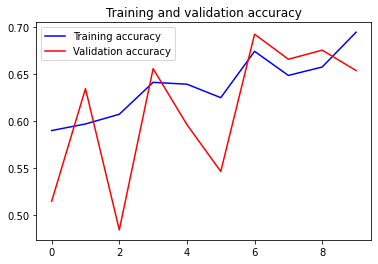

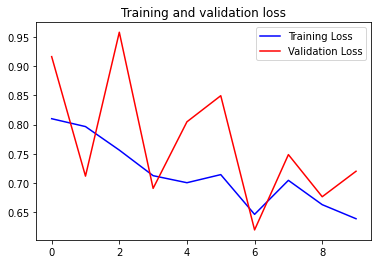

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [132]:
def Conv2d_bn(x,filter_num,kernel_size,strides=(1,1),padding='same'):
    x=Conv2D(filters=filter_num,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization(axis=3)(x)
    
    return x

In [165]:
def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):

    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides)(x)
    x = BatchNormalization(axis=3)(x)

    return x

In [160]:
def identity_block(inpt,filter_num,kernel_size,strides=(1,1),padding='same',with_conv_shortcut=False):
    x = Conv2d_BN(inpt, nb_filter=filter_num, kernel_size=kernel_size, strides=strides, padding='same')
    x = Conv2d_BN(x, nb_filter=filter_num, kernel_size=kernel_size, padding='same')
#     x= Conv2d_bn(inpt,filter_num=filter_num,kernel_size=kernel_size,strides=strides,padding='same')
#     x= Activation('relu')(x)
#     x= Conv2d_bn(x,filter_num=filter_num,kernel_size=kernel_size,padding='same')
#     x= Activation('relu')(x)
    if with_conv_shortcut:
        short_cut= Conv2d_BN(inpt,nb_filter=filter_num,kernel_size=kernel_size,strides=strides)
        x=add([x,short_cut])
    else:
        x=add([x,inpt])
        return x

In [166]:
def identity_Block(inpt, nb_filter, kernel_size, strides=(1, 1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt, nb_filter=nb_filter, kernel_size=kernel_size, strides=strides, padding='same')
    x = Activation('relu')(x)
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size, padding='same')
    x = Activation('relu')(x)
    if with_conv_shortcut:#shortcut的含义是：将输入层x与最后的输出层y进行连接，如上图所示
        shortcut = Conv2d_BN(inpt, nb_filter=nb_filter, strides=strides, kernel_size=kernel_size)
        x = add([x, shortcut])
        return x
    else:
        x = add([x, inpt])
        return x

In [167]:
def resnet(width,height,channel,classes):
    inpt=Input(shape=(width, height, channel))
    x = Conv2d_BN(inpt, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = Conv2d_BN(inpt, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
 
    #conv2_x
    x = identity_Block(x, nb_filter=64, kernel_size=(3, 3))
    x = identity_Block(x, nb_filter=64, kernel_size=(3, 3))
 
    #conv3_x
    x = identity_Block(x, nb_filter=128, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=128, kernel_size=(3, 3))
 
    #conv4_x
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3))
 
    #conv5_x
    x = identity_Block(x, nb_filter=512, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=512, kernel_size=(3, 3))

    x = GlobalAvgPool2D()(x)
    x = Dense(classes, activation='softmax')(x)

    model = Model(inputs=inpt, outputs=x)
    return model

In [162]:
def resnet_18(width,height,channel,classes):
    inpt = Input(shape=(width, height, channel))
    #x = ZeroPadding2D((3, 3))(inpt)
 
    #conv1
    x = Conv2d_BN(inpt, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
 
    #conv2_x
    x = identity_Block(x, nb_filter=64, kernel_size=(3, 3))
    x = identity_Block(x, nb_filter=64, kernel_size=(3, 3))
 
    #conv3_x
    x = identity_Block(x, nb_filter=128, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=128, kernel_size=(3, 3))
 
    #conv4_x
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3))
 
    #conv5_x
    x = identity_Block(x, nb_filter=512, kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=512, kernel_size=(3, 3))

    x = GlobalAvgPool2D()(x)
    x = Dense(classes, activation='softmax')(x)
 
    model = Model(inputs=inpt, outputs=x)
    return model

In [168]:
model = resnet(28, 28, 3, 3)

In [ ]:
resnet = 

In [79]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=['acc'])

In [80]:
history=model.fit(train_data,epochs=5,batch_size=50,validation_data=valid_data)

Epoch 1/5
 4/94 [>.............................] - ETA: 1:01 - loss: 0.3261 - acc: 0.8672

KeyboardInterrupt: 

In [47]:
tf.keras.applications.ResNet50??

In [48]:
!vim ~/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/applications/resnet.py

7[>4;2m=<w/lib/python3.8/site-packages/tensorflow/python/keras/applications/resnet.py"
"~/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/applications/resnet.py" 584L, 21329C▽  [>c]10;?]11;?
Press ENTER or type command to continue# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================# pylint: disable=invalid-name
"""ResNet

In [49]:
!cat ~/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/applications/resnet.py

# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
# pylint: disable=invalid-name
"""ResNet models for Keras.

Reference:
  - [Deep Residual Learning for Image Recognition](
      https://arxiv.org/abs/1512.03385) (CVPR 2015)
"""

from tensorflow.python.keras import backend
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.python.

In [201]:
def conv_bn(x,filter_num,kernel_size,strides=(1,1),padding='same'):
    x=Conv2D(filters=filter_num,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization(axis=3)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):

    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides)(x)
    x = BatchNormalization(axis=3)(x)

    return x

In [208]:
def identity_blocks(inpt,filter_num,kernel_size,strides=(1,1),padding='same',with_shortcut=False):
    x=conv_bn(inpt, filter_num=filter_num, kernel_size=kernel_size, strides=strides, padding='same')
    x=conv_bn(x, filter_num=filter_num, kernel_size=kernel_size, padding='same')
    if with_shortcut:
        shortcut=conv_bn(inpt, filter_num=filter_num, strides=strides, kernel_size=kernel_size)
        x=add([x,shortcut])
        return x
    else:
        x=add([x,inpt])
        return x



In [195]:
def identity_Block(inpt, nb_filter, kernel_size, strides=(1, 1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt, nb_filter=nb_filter, kernel_size=kernel_size, strides=strides, padding='same')
    x = Activation('relu')(x)
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size, padding='same')
    x = Activation('relu')(x)
    if with_conv_shortcut:#shortcut的含义是：将输入层x与最后的输出层y进行连接，如上图所示
        shortcut = Conv2d_BN(inpt, nb_filter=nb_filter, strides=strides, kernel_size=kernel_size)
        x = add([x, shortcut])
        return x
    else:
        x = add([x, inpt])
        return x

In [211]:
def resnet_v1(width,height,channel,class_num):
    inpt = Input(shape=(width, height, channel))
    # inpt=Input(shape=(width,height,channle))
    x = conv_bn(inpt, filter_num=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    #stage2
    x=identity_blocks(x,filter_num=64,kernel_size=(3,3),strides=(1,1),padding='same',with_shortcut=True)
    x=identity_blocks(x,filter_num=64,kernel_size=(3,3),strides=(1,1),padding='same')
    
    #stage3
    x=identity_blocks(x,filter_num=128,kernel_size=(3,3),strides=(1,1),padding='same',with_shortcut=True)
    x=identity_blocks(x,filter_num=128,kernel_size=(3,3),strides=(1,1),padding='same')
    
    #stage4
    x=identity_blocks(x,filter_num=256,kernel_size=(3,3),strides=(1,1),padding='same',with_shortcut=True)
    x=identity_blocks(x,filter_num=256,kernel_size=(3,3),strides=(1,1),padding='same')
    
    #stage5
    x=identity_blocks(x,filter_num=512,kernel_size=(3,3),strides=(1,1),padding='same',with_shortcut=True)
    x=identity_blocks(x,filter_num=512,kernel_size=(3,3),strides=(1,1),padding='same')
    
    x=GlobalAvgPool2D()(x)
    x=Dense(class_num,activation='softmax')(x)
    model=Model(inputs=inpt,outputs=x)
    return model

In [192]:
def resnet_v2(width,height,channel,classes):
    inpt = Input(shape=(width, height, channel))
    #x = ZeroPadding2D((3, 3))(inpt)
 
    #conv1
    x = conv_bn(inpt, filter_num=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
 
    #conv2_x
    x = identity_blocks(x, filter_num=64, kernel_size=(3, 3))
    x = identity_blocks(x, filter_num=64, kernel_size=(3, 3))
 
    #conv3_x
    x = identity_blocks(x, filter_num=128, kernel_size=(3, 3), strides=(2, 2), with_shortcut=True)
    x = identity_blocks(x, filter_num=128, kernel_size=(3, 3))
 
    #conv4_x
    x = identity_blocks(x, nb_filter=256, kernel_size=(3, 3), strides=(2, 2), with_shortcut=True)
    x = identity_blocks(x, nb_filter=256, kernel_size=(3, 3))
 
    #conv5_x
    x = identity_blocks(x, filter_num=512, kernel_size=(3, 3), strides=(2, 2), with_shortcut=True)
    x = identity_blocks(x, filter_num=512, kernel_size=(3, 3))

    x = GlobalAvgPool2D()(x)
    x = Dense(classes, activation='softmax')(x)
 
    model = Model(inputs=inpt, outputs=x)
    return model

In [212]:
model=resnet_v1(224,224,3,3)

In [213]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_303 (Conv2D)             (None, 109, 109, 64) 9472        input_51[0][0]                   
__________________________________________________________________________________________________
batch_normalization_285 (BatchN (None, 109, 109, 64) 256         conv2d_303[0][0]                 
__________________________________________________________________________________________________
activation_214 (Activation)     (None, 109, 109, 64) 0           batch_normalization_285[0][0]    
____________________________________________________________________________________________

In [ ]:
mode